# Predicting California House Prices

## Introduction  
In this notebook, we explore the Ames housing dataset and experiment with various machine learning methods to build a model that predicts the price of houses.  

### Overview  
Our approach involves several steps:  
1. **Exploratory Data Analysis (EDA):**  
   - We analyzed the dataset to uncover patterns and relationships between variables.  
2. **Data Cleaning and Preprocessing:**  
   - We handled missing values, normalized features, and prepared the data for modeling.  
3. **Machine Learning Models:**  
   - We trained and evaluated the following regression methods:  
     - **Linear Regression**  
     - **Lasso Regression**  
     - **Ridge Regression**  
     - **Regression Trees**  
     - **Random Forests**  
     - **Gradient Boosting Regression**  

### Objective  
The goal of this project is to compare the performance of these models in predicting house prices.

### Evaluation Metric  
To evaluate model performance, we use the **Root Mean Squared Error (RMSE)** metric. At the end, we compare the RMSE scores across all models to determine the best-performing method.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('C:/Users/user/1/Downloads/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print('Training Set Shape:', df.shape)

Training Set Shape: (1460, 81)


## Dataset Overview  

The dataset contains **80 explanatory features**, providing detailed information about nearly every aspect of residential homes. These features include:  
- Physical attributes of the houses (e.g., size, number of rooms, type of construction)  
- Location-based variables (e.g., neighborhood, proximity to amenities)  
- Quality metrics (e.g., condition, material qua
  
This rich set of features allows for a comprehensive eploration and analysis of factors influencing house prices rices.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Exploratory Data Analysis 

In [6]:
pd.set_option('display.max_rows', None)
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

We will explore the variables in order to understand their nature 
- Which of the numerical columns can be categorized as descrete ?
- Are there any numerical variables which in fact are categorical ? 

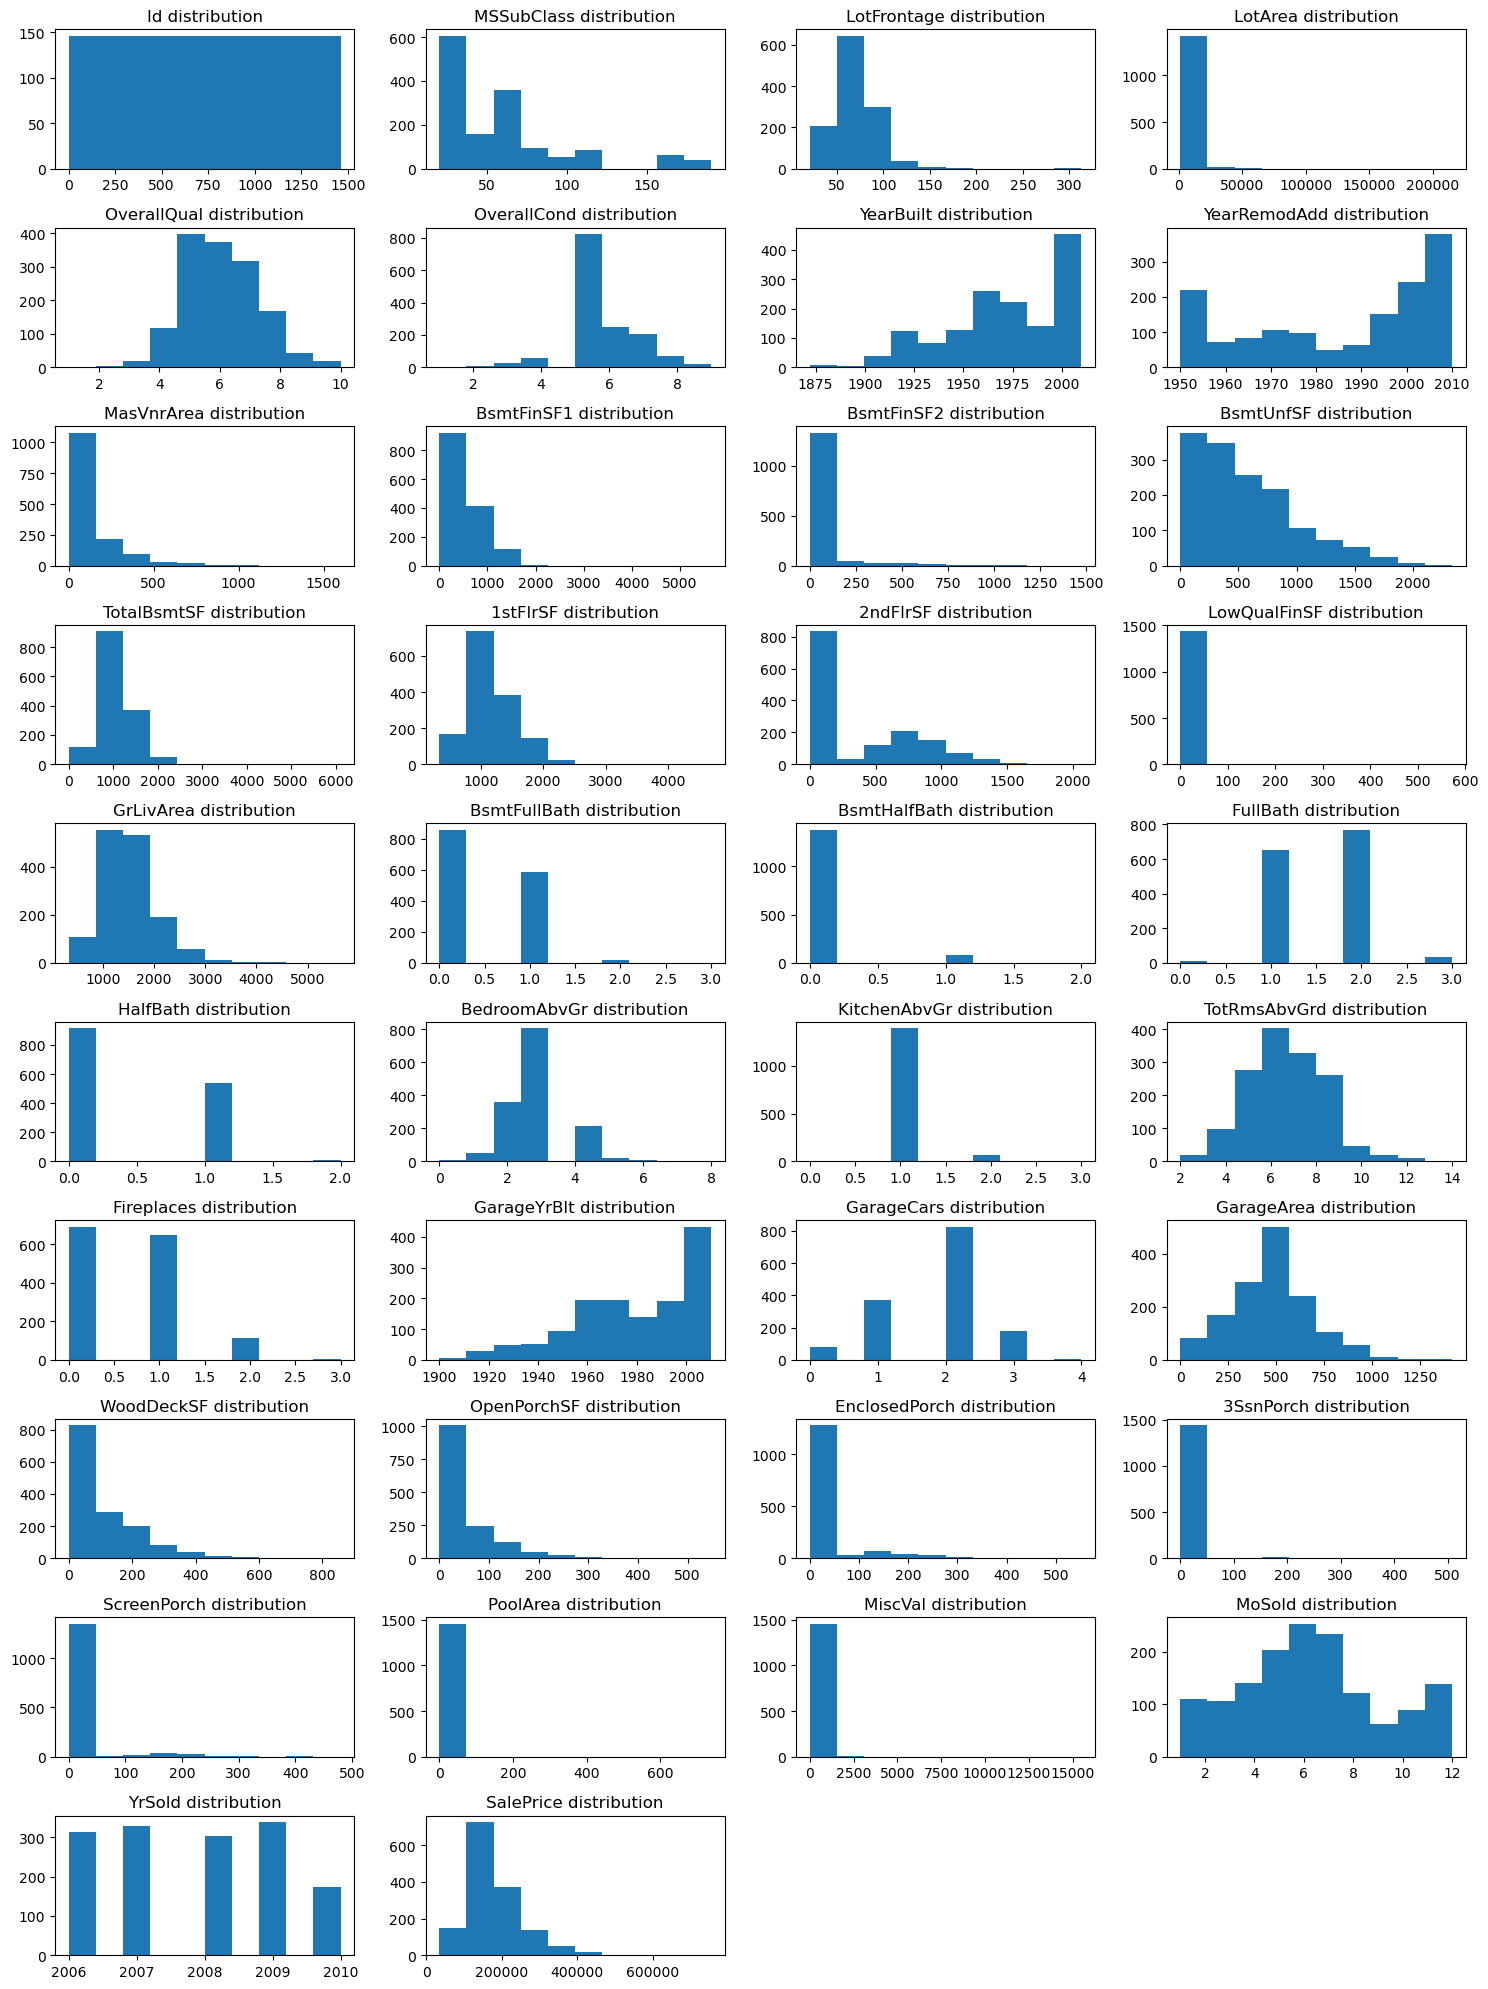

In [7]:
numericals = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,20))
for i, col in enumerate(numericals.columns, 1):
    plt.subplot(10,4,i)
    plt.hist(df[col])
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.show()

We notice that some features, such as **`GarageCars`**, have only a few distinct values. These variables are better treated as **discrete variables** rather than continuous ones.  

### Next Steps  
We will identify all the discrete numerical variables in the dataset to ensure they are correctly categorized for analysis and modeling. Proper categorization will help us apply the most suitable preprocessing techniques and avoid potential modelingror ers.  


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
discrete_vals = {}
discretes = []
for key, value in df.select_dtypes(include=['number']).nunique().iteritems():
    if value < 12:
        discretes.append(key)
        discrete_vals[key] = value
    else:
        continue

print(len(discrete_vals))
discrete_vals

12


{'OverallQual': 10,
 'OverallCond': 9,
 'BsmtFullBath': 4,
 'BsmtHalfBath': 3,
 'FullBath': 4,
 'HalfBath': 3,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 4,
 'Fireplaces': 4,
 'GarageCars': 5,
 'PoolArea': 8,
 'YrSold': 5}

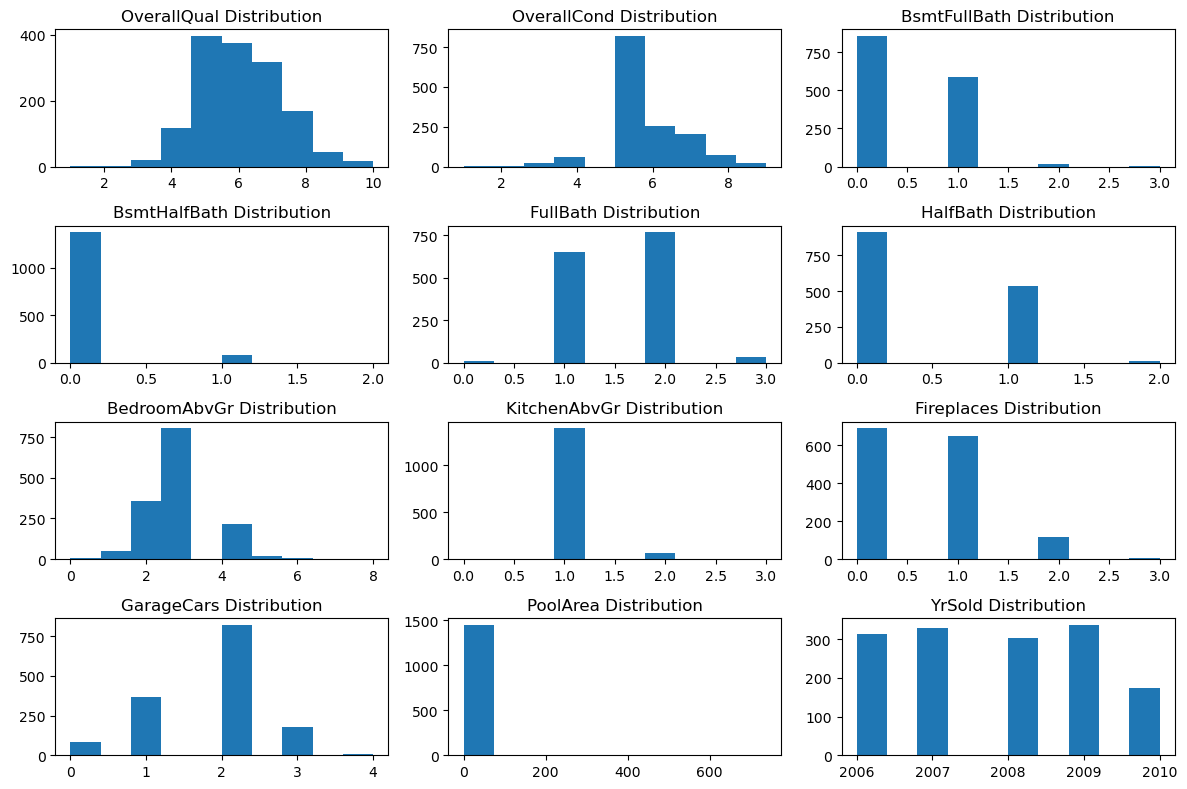

In [9]:
plt.figure(figsize=(12,8))
for i, column in enumerate(discrete_vals.keys(), 1):
    plt.subplot(4,3,i)
    plt.hist(df[column])
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

### Exploring Categorical Features  

Next, we will focus on the **categorical features** in the dataset.  
Our goal is t
- :  Expline the distribution of each categorical variable.  
- Identify potential patterns or imbalances in the data.  

This exploration will help us understand how these features may influence the target variable and guide our preprocessinsig decins.  


In [10]:
categorical_vals = {}
categoricals = []
for key, value in df.select_dtypes(include=['object']).nunique().iteritems():
    if value < 12:
        categoricals.append(key)
        categorical_vals[key] = value
    else:
        continue

print(len(categorical_vals))
categorical_vals

40


{'MSZoning': 5,
 'Street': 2,
 'Alley': 2,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'MasVnrType': 4,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 4,
 'BsmtCond': 4,
 'BsmtExposure': 4,
 'BsmtFinType1': 6,
 'BsmtFinType2': 6,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 5,
 'KitchenQual': 4,
 'Functional': 7,
 'FireplaceQu': 5,
 'GarageType': 6,
 'GarageFinish': 3,
 'GarageQual': 5,
 'GarageCond': 5,
 'PavedDrive': 3,
 'PoolQC': 3,
 'Fence': 4,
 'MiscFeature': 4,
 'SaleType': 9,
 'SaleCondition': 6}

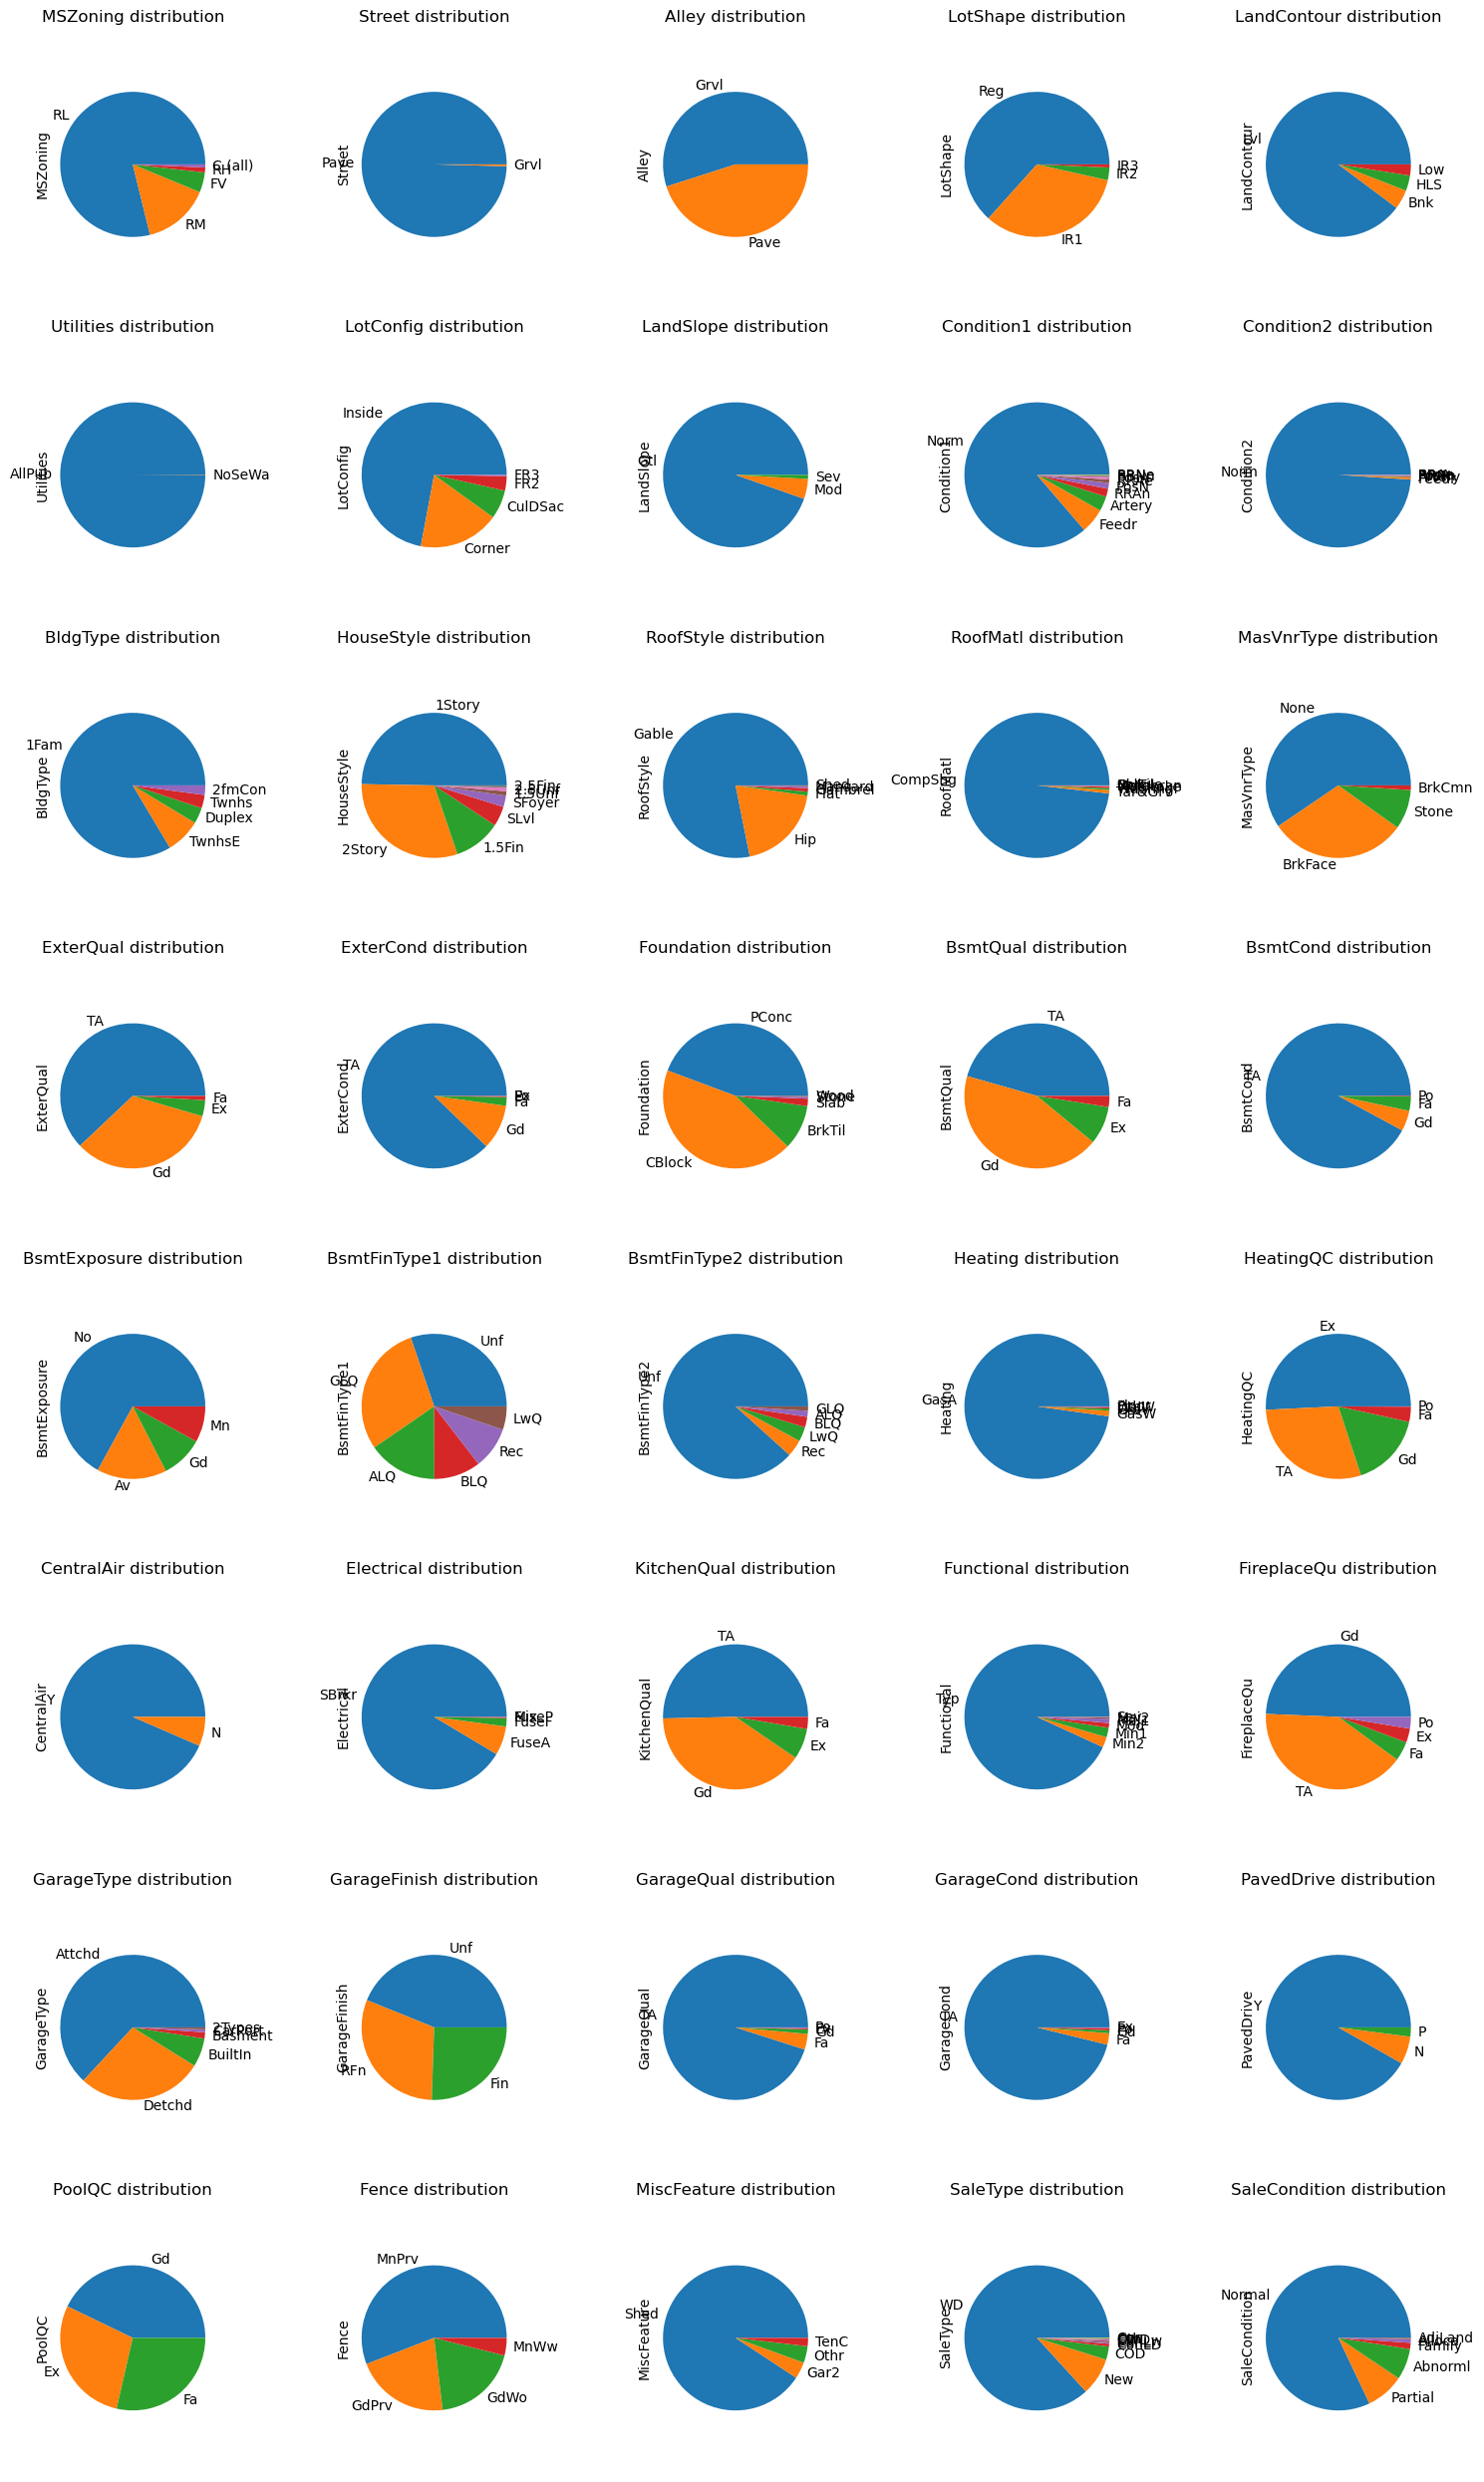

In [89]:
plt.figure(figsize=(15,25))
for i, key in enumerate(categorical_vals.keys(), 1):
    plt.subplot(8, 5, i)
    df[key].value_counts().plot.pie()
    plt.title(f'{key} distribution')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

## Data Cleaning  

As part of the data cleaning process, we aim to remove unnecessary or irrelevant features:  
 - The **`Id`** column does not carry any meaningful information for our analysis or modeling. Therefore, we will drop it from the dataset.  
- The **`Utilities`** column, as we see below, has 2 levels and the one of them has just one entry, it doe nots provideanyo informatiol, so we will drop it.  


In [92]:
df.drop('Id', axis=1, inplace=True)

In [93]:
# Utilities: Type of utilities available
df['Utilities'].value_counts()
df.drop('Utilities', axis=1, inplace=True)

### Handling Null Values

In [94]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

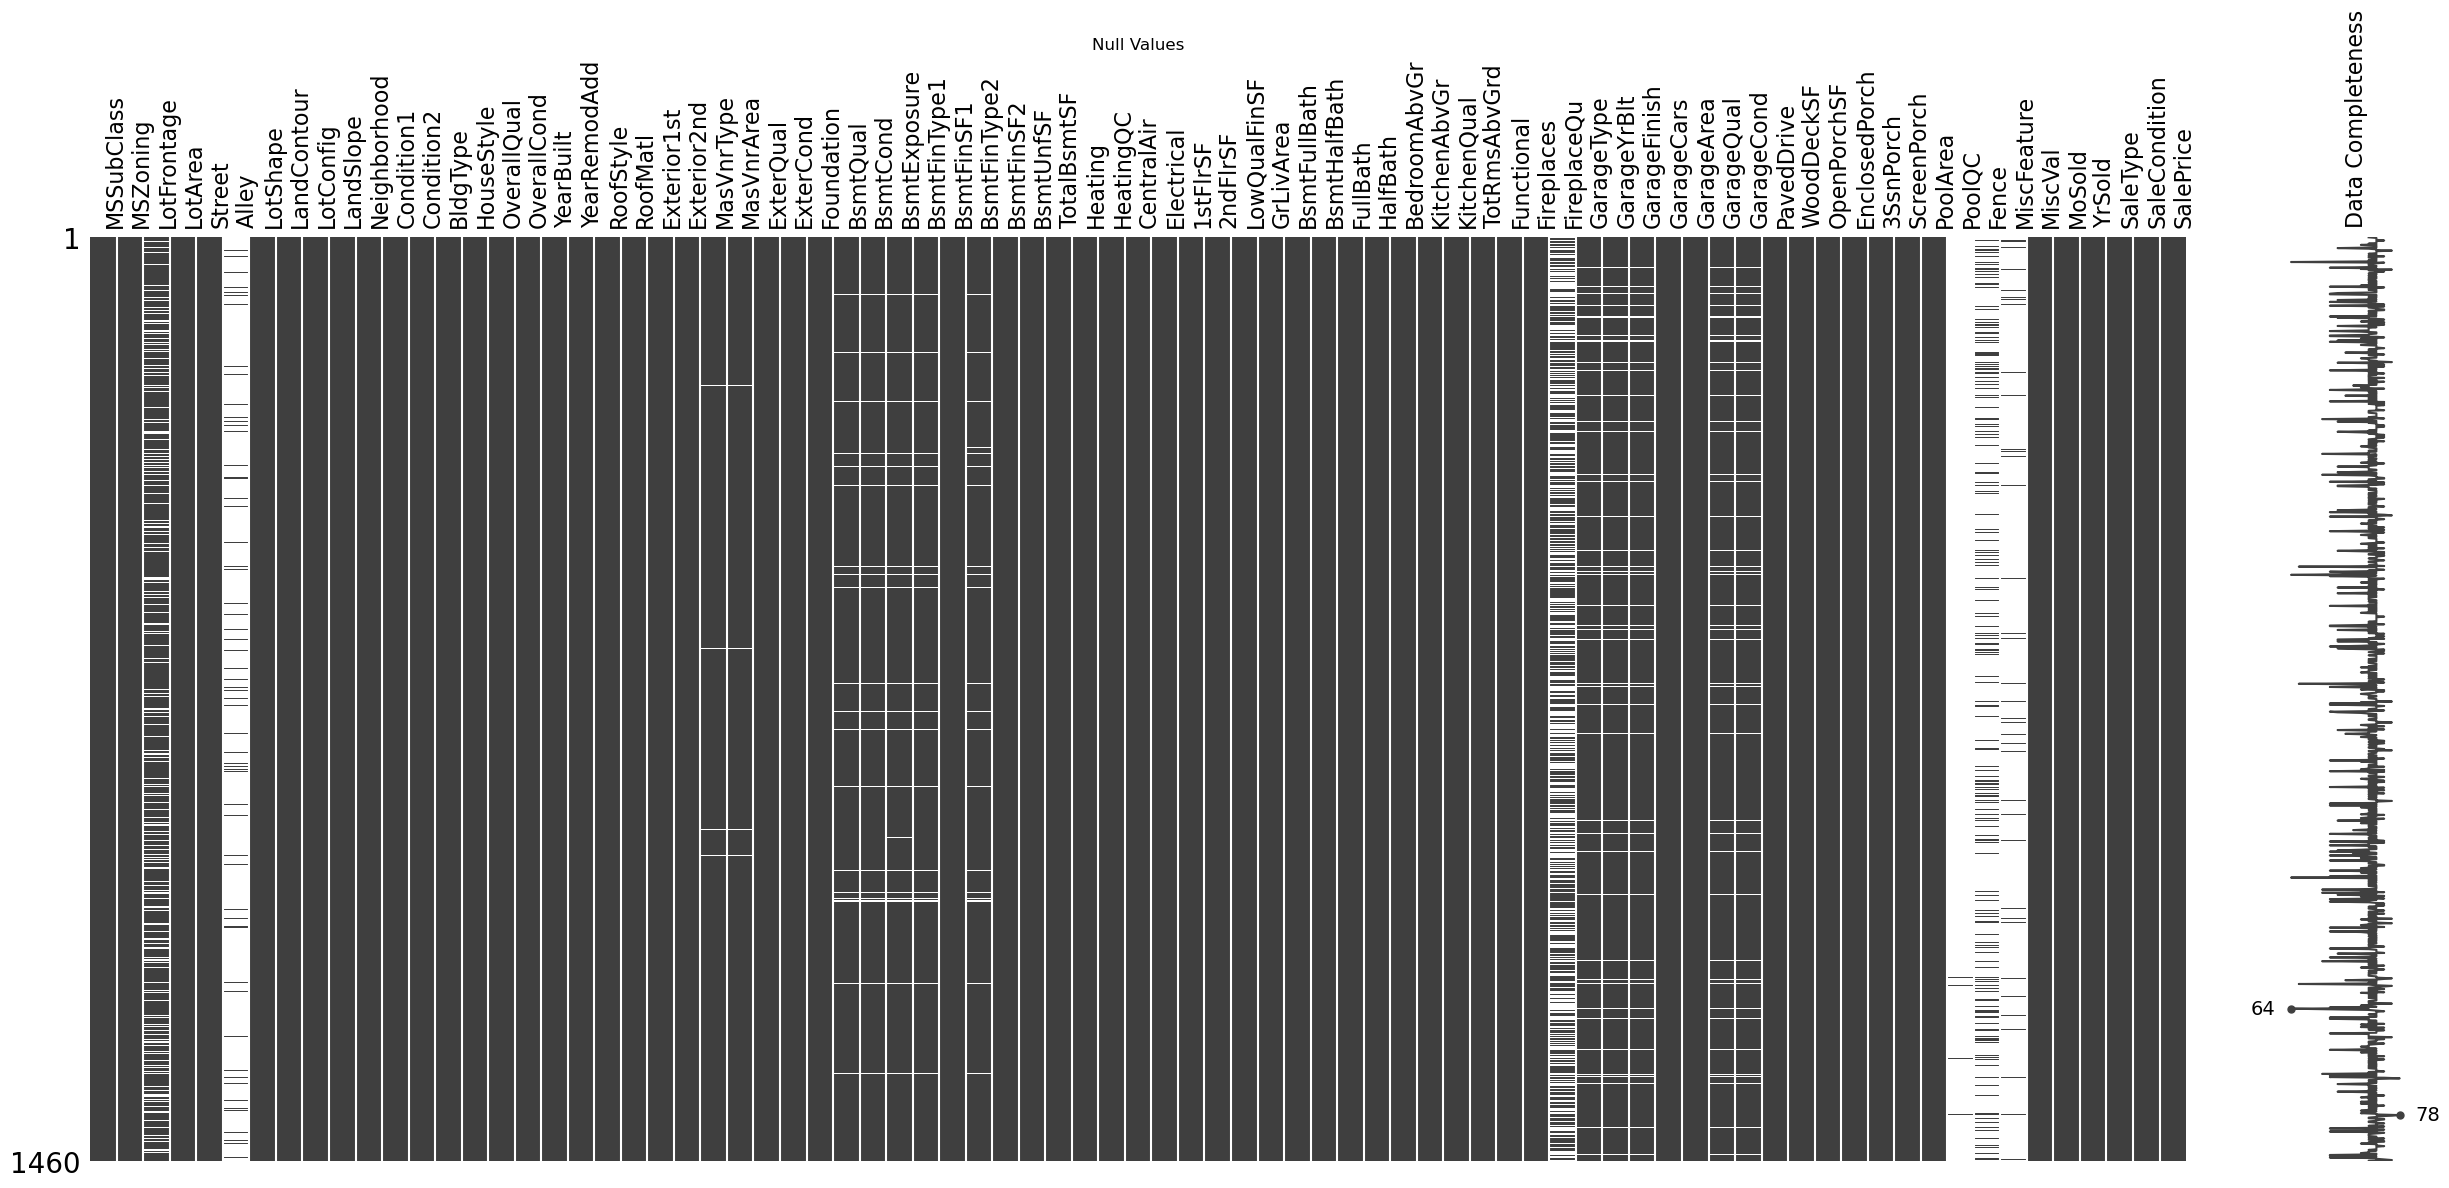

In [95]:
msno.matrix(df, labels=True, figsize=(30,12), label_rotation=90)
plt.title('Null Values')
plt.show()

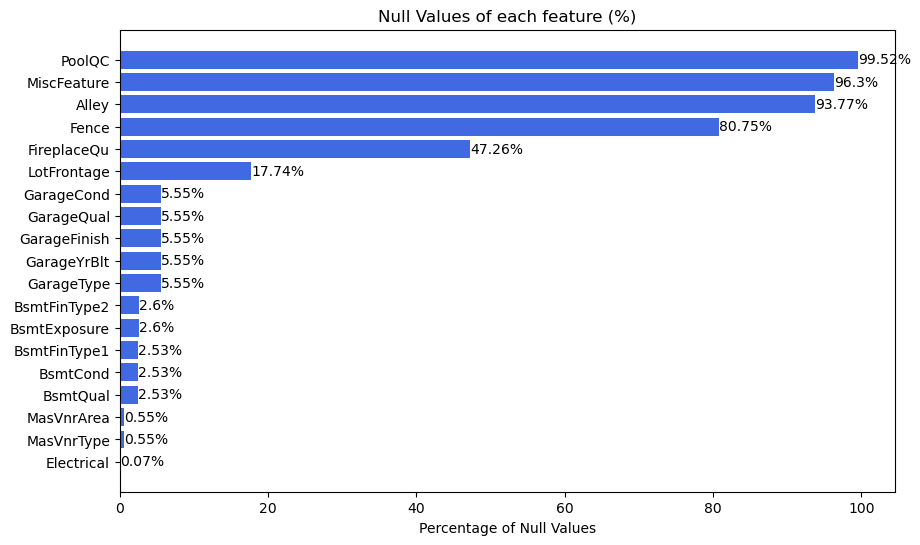

In [96]:
null_percentage = {}
for col in df.columns:
    sum_null = df[col].isnull().sum()
    sum_null_perc = 100 * sum_null / df.shape[0]
    if sum_null_perc != 0:
        null_percentage[col] = round(sum_null_perc, 2)
    else:
        continue

sorted_null_percentage = {k: v for k, v in sorted(null_percentage.items(), key=lambda item: item[1], reverse=False)}

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_null_percentage)), list(sorted_null_percentage.values()), align='center', color='royalblue')

plt.yticks(range(len(sorted_null_percentage)), list(sorted_null_percentage.keys()))
plt.xlabel('Percentage of Null Values')
plt.title('Null Values of each feature (%)')

for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{list(sorted_null_percentage.values())[i]}%', va='center', ha='left')

plt.show()


## Handling Null Values  

In the dataset, several columns contain **NaN** values, including:  
- `Alley`, `MiscFeature`, `Fence`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, and `PoolQC`.  

For example, a **NaN** value in the `BsmtQual` or `BsmtCond` column indicates that the house does not have a basement.  

### Strategy for Handling Missing Data  
To standardize the dataset and handle missing values:  
- For **discrete variables**, we will replace NaN values with the label **'No'**, indicating the absence of a feature.  
- For **ordinal columns**, we will replace NaN values with **-1**, signaling a missing or undefined value in the ordinal scale.  

This approach ensures that missing data does not negatively affect our analysis or modeling process.  


In [97]:
# Alley: Type of alley access to property
df['Alley'] = np.where(df['Alley'].isnull(), 'No', df['Alley'])
df['Alley'].value_counts()

No      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [98]:
# MiscFeature : Miscellaneous feature not covered in other categories
# MiscVal : $Value of miscellaneous feature

df['MiscFeature'].fillna('No', inplace=True)

df.loc[df['MiscFeature']!='No', 'MiscFeature'] = 'Yes'

print(df['MiscFeature'].value_counts())
df.drop('MiscVal', axis=1, inplace=True)


No     1406
Yes      54
Name: MiscFeature, dtype: int64


In [99]:
# Fence
df['Fence'].fillna('No', inplace=True)

df['Fence'] = np.where(df['Fence']!='No', 'Yes', df['Fence'])

df['Fence'].value_counts()

No     1179
Yes     281
Name: Fence, dtype: int64

In [100]:
# PoolQC : Pool Quality
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [101]:
# PoolArea : Pool Area in square feet
df['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

- The **`PoolQC`** variable contains information about the quality of the pool, but it has very limited variance. Only **7 houses** have a pool, while **1453 houses** do not. This extreme imbalance makes the variable uninformative for our model, so we will **drop** it.

- Regarding the **`PoolArea`** variable, rather than focusing on the actual area of the pool, we will convert it into a **binary variable**. This new variable will indicate whether a house has a pool (**1**) or not (**0**), simplifying the feature and making it more useful for our model.  

In [102]:
df['PoolQC'].fillna(-1, inplace=True)

df['Pool'] = np.where(df['PoolQC']==-1, 0, 1) # 0: No, 1: Yes

df.drop('PoolQC', axis=1, inplace=True)
df.drop('PoolArea', axis=1, inplace=True)

In [103]:
# Fireplaces
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

- 690 houses don't have any fireplace, so we expect 690 NaN values for the column **`FireplaceQu`**

In [104]:
df.FireplaceQu.isnull().sum()

690

In [105]:
# FireplaceQu : Fireplace Quality
print(df['FireplaceQu'].value_counts())

rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['FireplaceQu'] = df['FireplaceQu'].map(rating_map)

print("")
# Fill missing values with -1
df['FireplaceQu'].fillna(-1, inplace=True)

print(df['FireplaceQu'].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

-1.0    690
 4.0    380
 3.0    313
 2.0     33
 5.0     24
 1.0     20
Name: FireplaceQu, dtype: int64


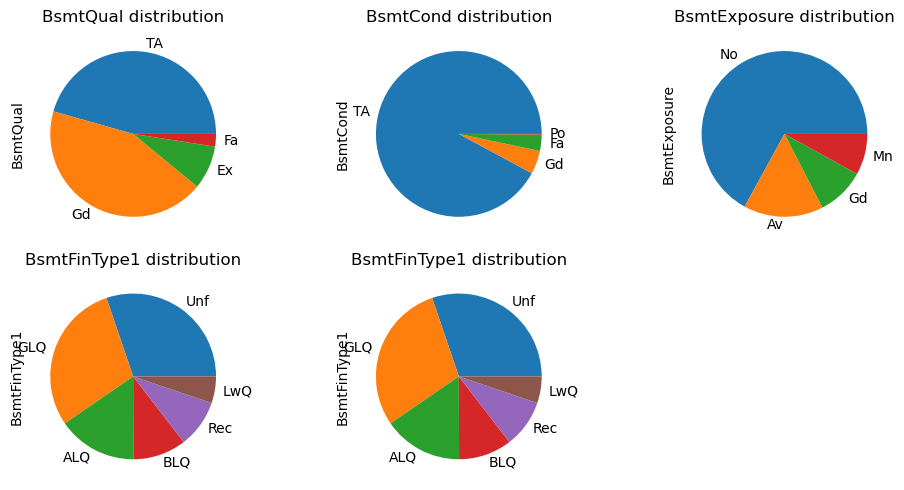

In [106]:
# Basement
plt.figure(figsize=(10,5))
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType1']
for i, col in enumerate(cols, 1):
    plt.subplot(2,3,i)
    df[col].value_counts().plot.pie()
    plt.title(f'{col} distribution')
        
plt.tight_layout()
plt.show()

In [107]:
# NaN values indicate that there is no basement

# BsmtQual : Basement Quality 
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['BsmtQual'] = df['BsmtQual'].map(rating_map)
df['BsmtQual'].fillna(-1, inplace=True)

print(df['BsmtQual'].value_counts())

print("")
# BsmtCond : Basement Condition
# NaN values indicate that there is no basement
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['BsmtCond'] = df['BsmtCond'].map(rating_map)
df['BsmtCond'].fillna(-1, inplace=True)

print(df['BsmtCond'].value_counts())
    
print("")
# BsmtExposure: Refers to walkout or garden level walls
rating_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
df['BsmtExposure'] = df['BsmtExposure'].map(rating_map)  
df['BsmtExposure'].fillna(-1, inplace=True)


print(df['BsmtExposure'].value_counts())

print("")
# BsmtFinType1: Rating of basement finished area
rating_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LWQ': 2, 'Unf': 1}
df['BsmtFinType1'] = df['BsmtFinType1'].map(rating_map)
df['BsmtFinType1'].fillna(-1, inplace=True)

print(df['BsmtFinType1'].value_counts())

print("")
# BsmtFinType2: Rating of basement finished area (if multiple types)
rating_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LWQ': 2, 'Unf': 1}
df['BsmtFinType2'] = df['BsmtFinType2'].map(rating_map)
df['BsmtFinType2'].fillna(-1, inplace=True)

print(df['BsmtFinType2'].value_counts())

 3.0    649
 4.0    618
 5.0    121
-1.0     37
 2.0     35
Name: BsmtQual, dtype: int64

 3.0    1311
 4.0      65
 2.0      45
-1.0      37
 1.0       2
Name: BsmtCond, dtype: int64

 1.0    953
 3.0    221
 4.0    134
 2.0    114
-1.0     38
Name: BsmtExposure, dtype: int64

 1.0    430
 6.0    418
 5.0    220
 4.0    148
 3.0    133
-1.0    111
Name: BsmtFinType1, dtype: int64

 1.0    1256
-1.0      84
 3.0      54
 4.0      33
 5.0      19
 6.0      14
Name: BsmtFinType2, dtype: int64


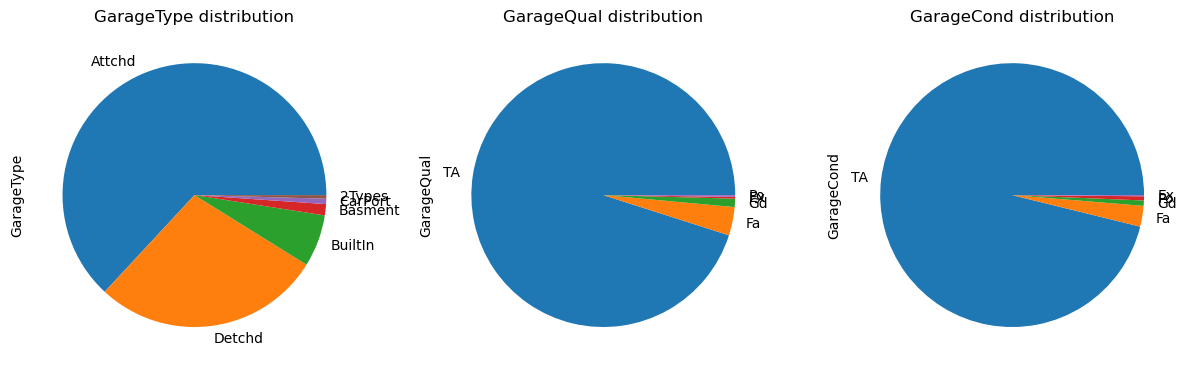

In [177]:
# Garage
plt.figure(figsize=(12,5))
cols = ['GarageType', 'GarageQual', 'GarageCond']
for i, col in enumerate(cols, 1):
    plt.subplot(1,3,i)
    df[col].value_counts().plot.pie()
    plt.title(f'{col} distribution')

plt.subplot(1,3,1)
plt.tight_layout()
plt.show()

In [109]:
# NaN values indicate that there is no garage

# GarageType: Garage location
df['GarageType'].fillna('NoGarage', inplace=True)

# GarageFinish: Interior finish of the garage
df['GarageFinish'].fillna('NoGarage', inplace=True)

# GarageQual: Garage quality
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['GarageQual'] = df['GarageQual'].map(rating_map)
df['GarageQual'].fillna(-1, inplace=True)

print(df['GarageQual'].value_counts())

print("")
# GarageCond: Garage condition
rating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['GarageCond'] = df['GarageCond'].map(rating_map)
df['GarageCond'].fillna(-1, inplace=True)

print(df['GarageCond'].value_counts())

df.drop('GarageYrBlt', axis=1, inplace=True)

 3.0    1311
-1.0      81
 2.0      48
 4.0      14
 5.0       3
 1.0       3
Name: GarageQual, dtype: int64

 3.0    1326
-1.0      81
 2.0      35
 4.0       9
 1.0       7
 5.0       2
Name: GarageCond, dtype: int64


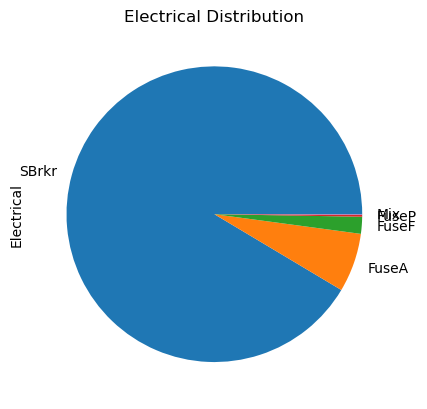

In [110]:
# Electrical
df.Electrical.value_counts().plot.pie()
plt.title('Electrical Distribution')
plt.show()
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

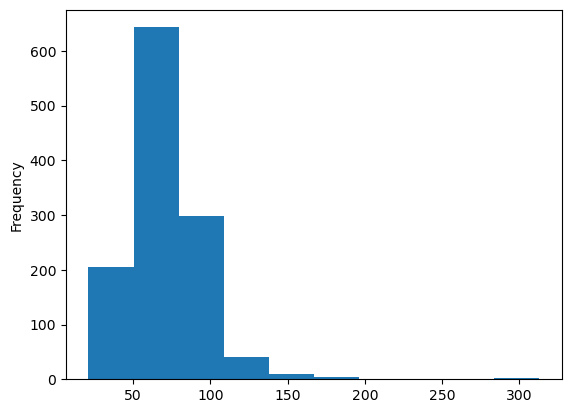

In [111]:
# LotFrontage: Linear feet of street connected to property",
df['LotFrontage'].plot.hist()
plt.show()
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

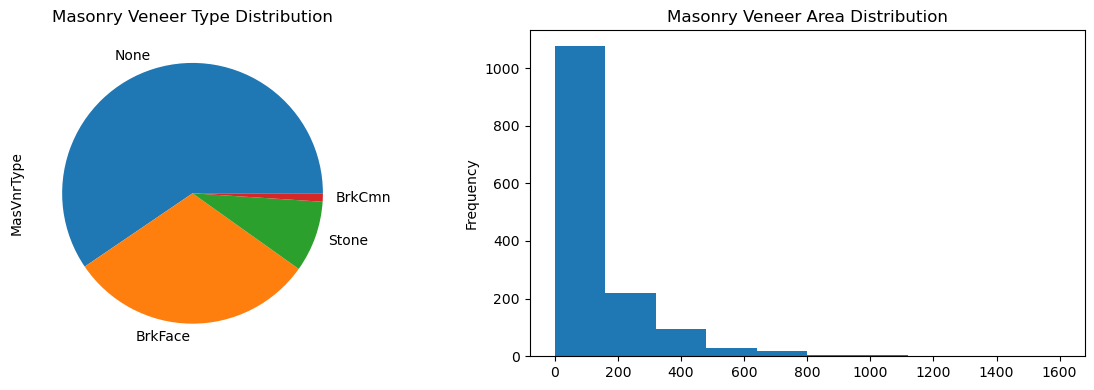

In [112]:
# MasVnrType: Masonry veneer type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['MasVnrType'].value_counts().plot.pie()
plt.title('Masonry Veneer Type Distribution')
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)

# MasVnrArea: Masonry veneer area in square feet
plt.subplot(1,2,2)
df['MasVnrArea'].plot.hist()
plt.title('Masonry Veneer Area Distribution')

plt.tight_layout()
plt.show()

df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

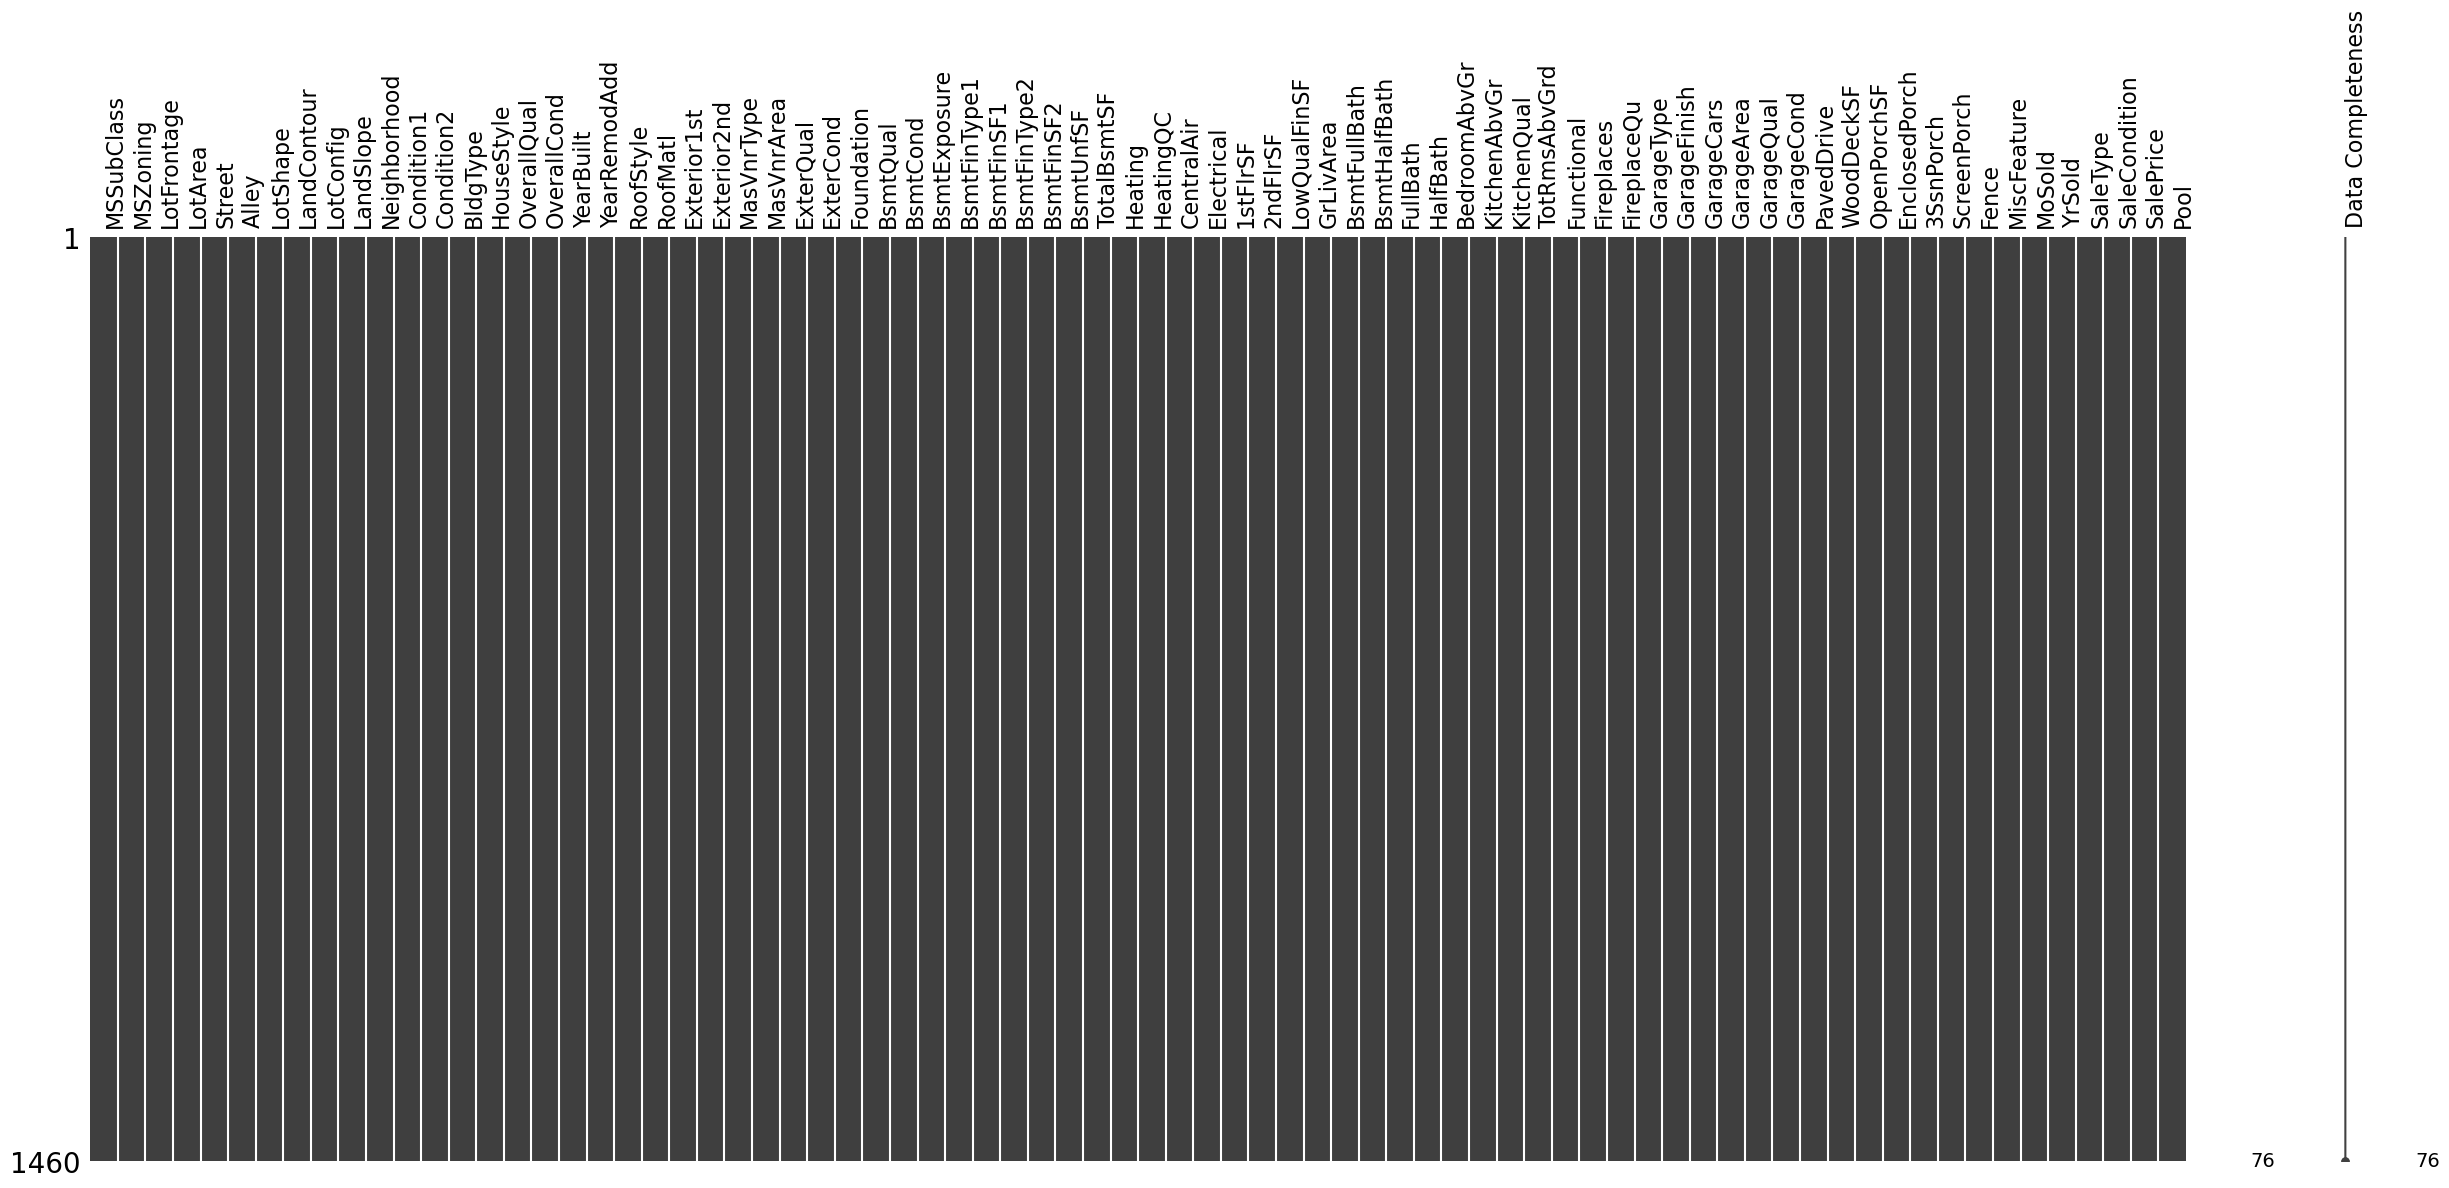

In [113]:
msno.matrix(df, labels=True, figsize=(30,12), label_rotation=90)
plt.show()

In [114]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,-1.0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,140000,0
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,250000,0


### Multivariate Analysis

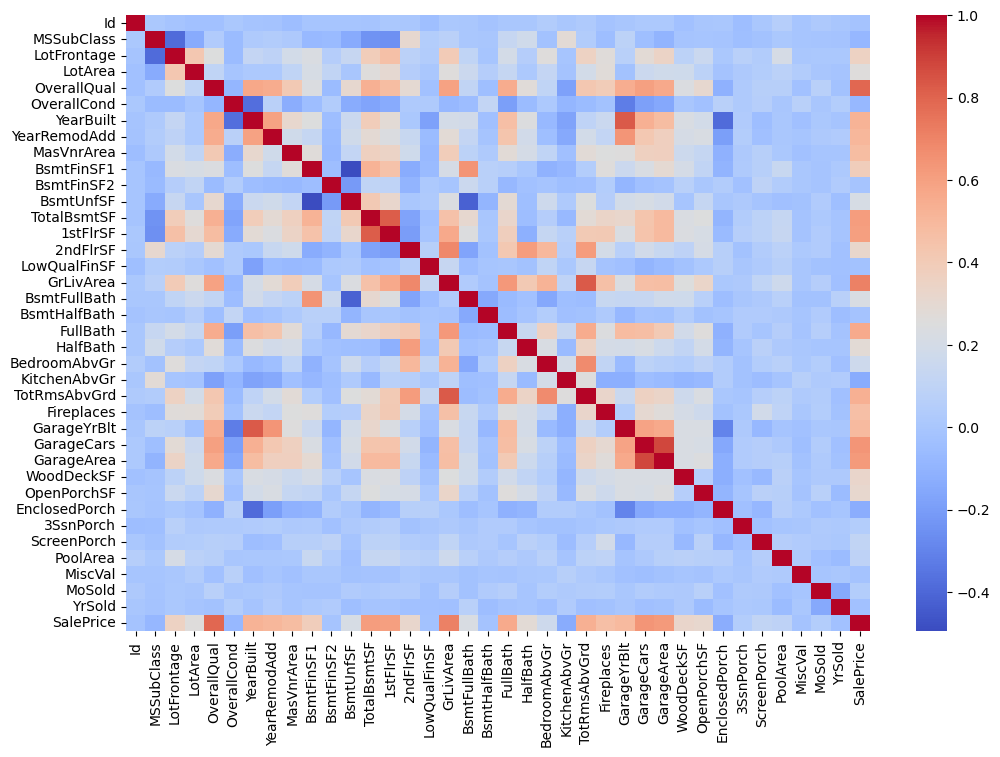

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

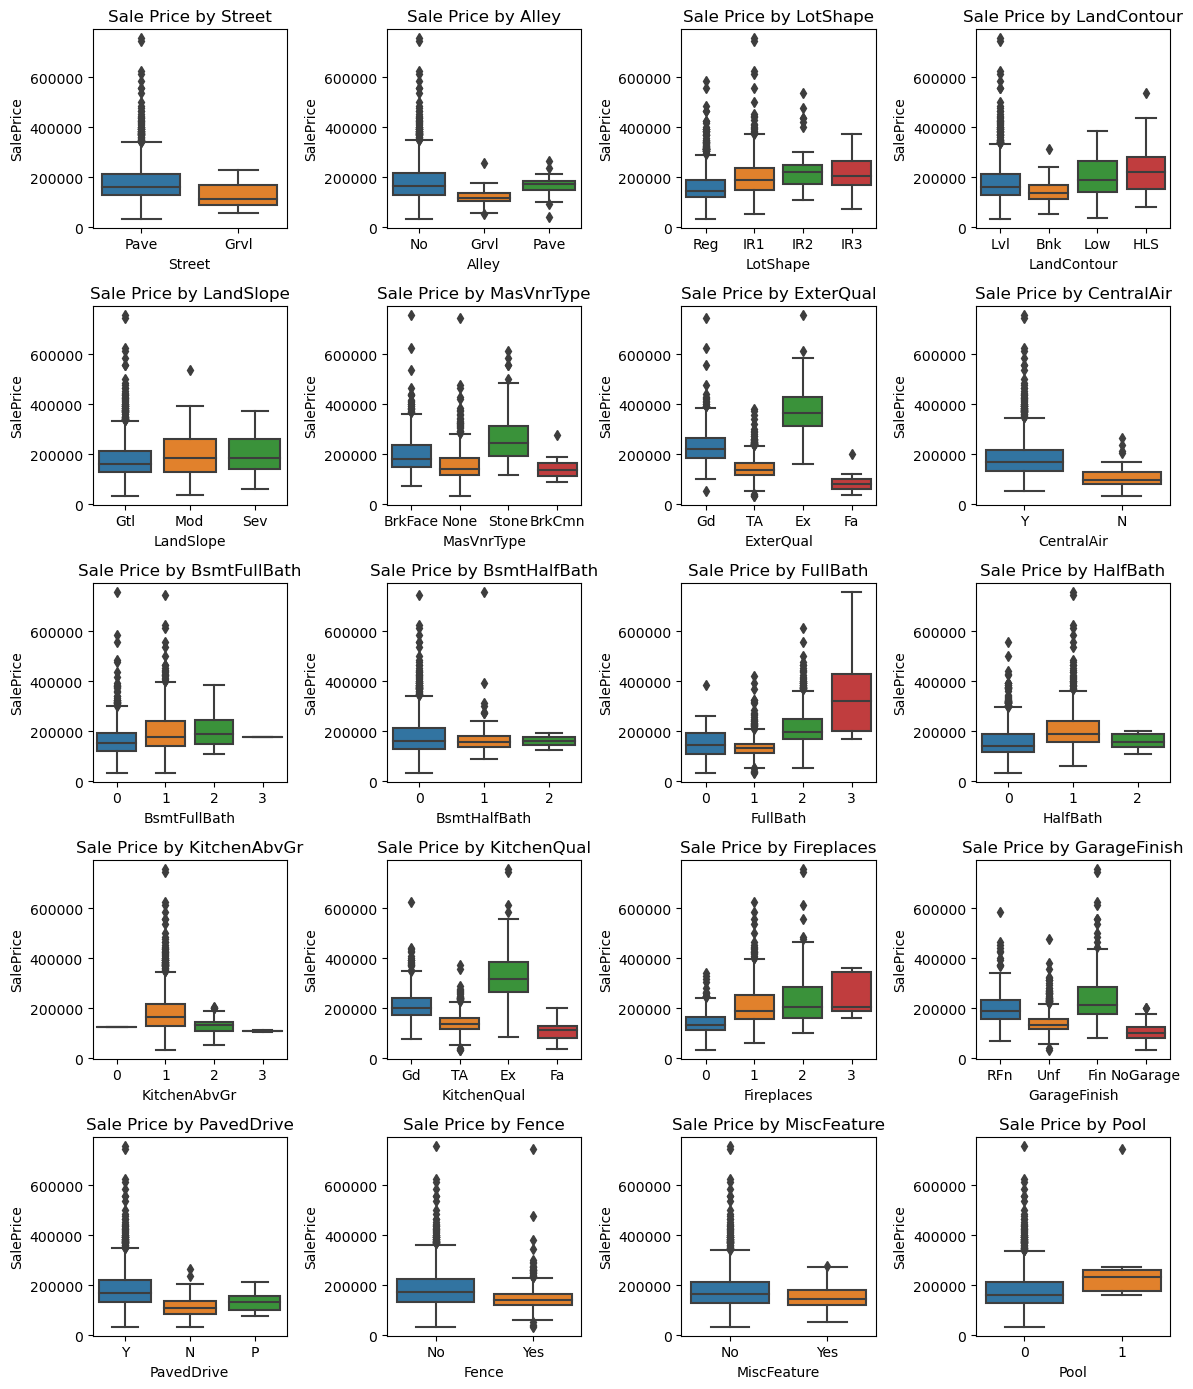

In [115]:
categ = []
for i in df.columns:
    if df[i].nunique()<5:
        categ.append(i)

plt.figure(figsize=(12,14))
for i, col in enumerate(categ, 1):
    plt.subplot(5,4,i)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Sale Price by {col}')

plt.tight_layout()
plt.show()

## Feature Engineering

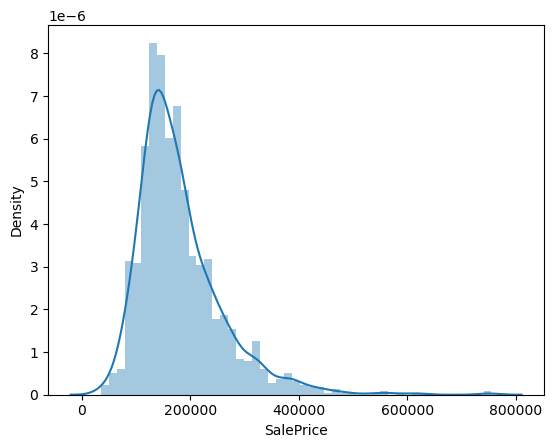

In [116]:
sns.distplot(df['SalePrice'])
plt.show()

In [117]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


- The distribution plot of **`SalePrice`** suggests that the variable tends to follow a Gaussian distribution. However, there is noticeable **positive skewness** due to the presence of several outliers, which can impact model performance.  

- To address this, we will apply a **logarithmic transformation** to compress the range of the values. This transformation will help to make the distribution more symmetrical and reduce the influence of extreme outliers.  

In [118]:
df['SalePrice'] = np.log(df['SalePrice'])

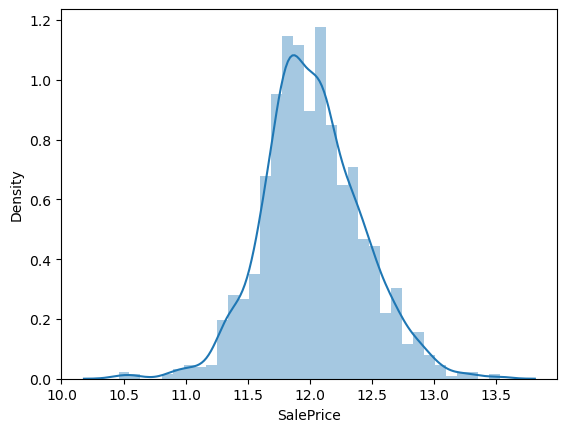

In [119]:
sns.distplot(df['SalePrice'])
plt.show()

- As we can observe from the following histograms, several explanatory variables, similar to our target variable **`SalePrice`**, exhibit **positive skewness** in their distributions.  

- To improve the model's performance and reduce the impact of skewness, we will apply the **logarithmic transformation** to these variables as well. This will help to compress their range and make their distributions more symmetrical, similar to what we did with the target variable.  


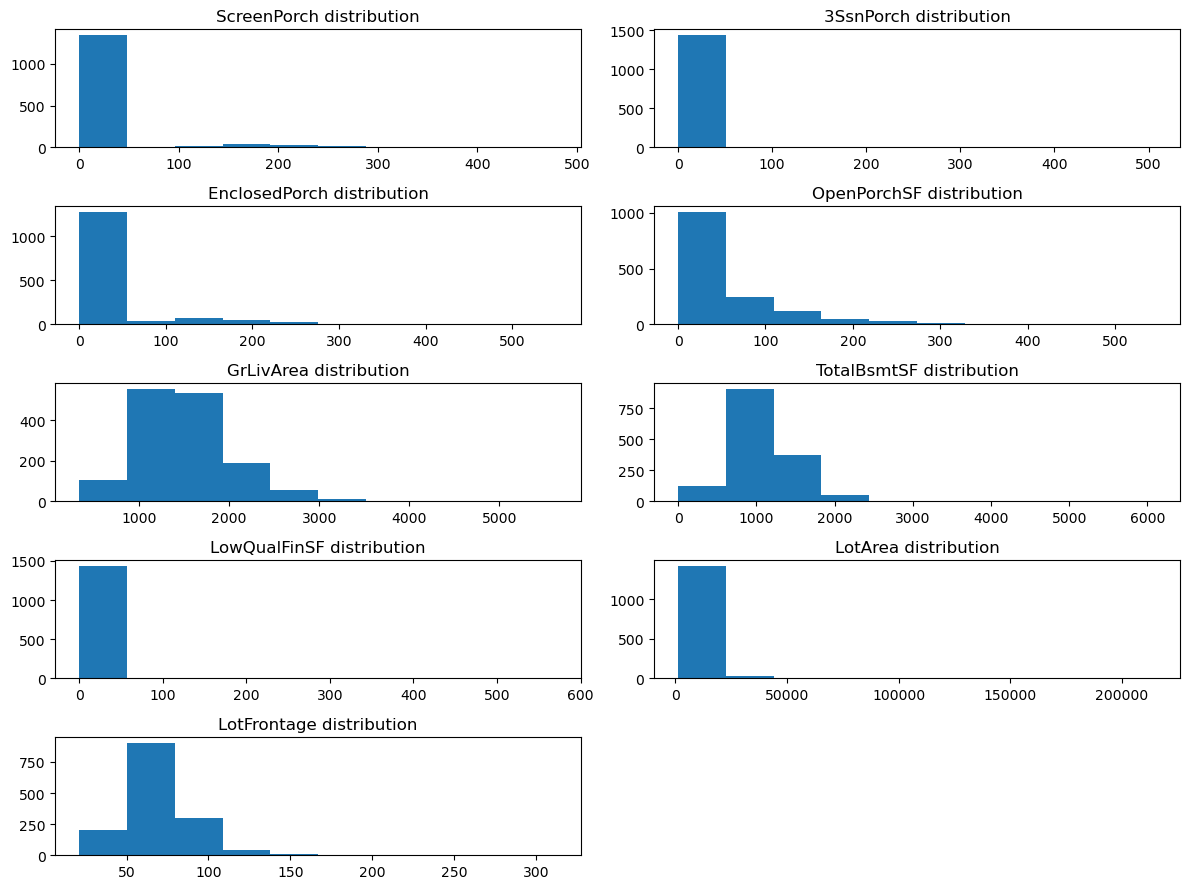

In [121]:
cols = ['ScreenPorch', '3SsnPorch', 'EnclosedPorch','OpenPorchSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','LotFrontage']

plt.figure(figsize=(12,9))
for j, i in enumerate(cols, 1):
    plt.subplot(5,2,j)
    plt.hist(df[i])
    plt.title(f'{i} distribution')

plt.tight_layout()
plt.show()

In [122]:
cols = ['GrLivArea','LotArea','LotFrontage']

for i in cols:
    df[i] = np.log1p(df[i])

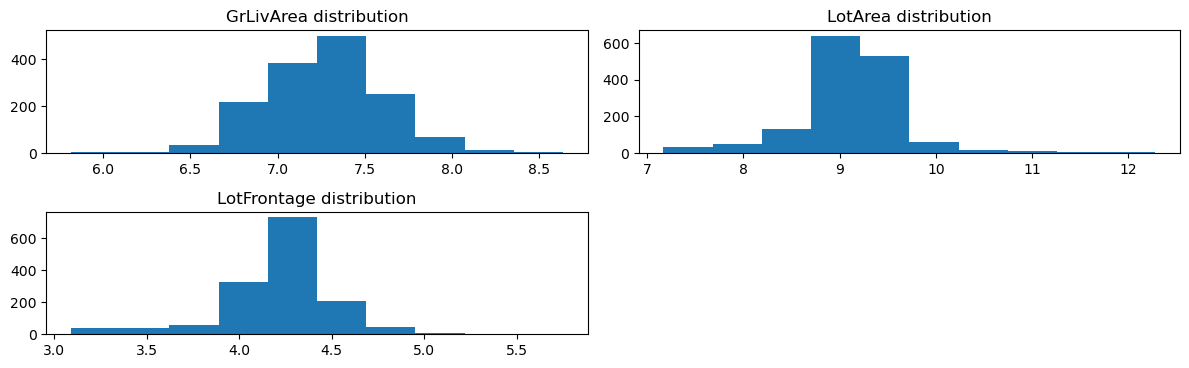

In [123]:
plt.figure(figsize=(12,9))
for j, i in enumerate(cols, 1):
    plt.subplot(5,2,j)
    plt.hist(df[i])
    plt.title(f'{i} distribution')

plt.tight_layout()
plt.show()

In [124]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,4.189655,9.042040,Pave,No,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,-1.0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,12.247694,0
1,20,RL,4.394449,9.169623,Pave,No,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,3.0,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,12.109011,0
2,60,RL,4.234107,9.328212,Pave,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,3.0,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,12.317167,0
3,70,RL,4.110874,9.164401,Pave,No,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,4.0,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,11.849398,0
4,60,RL,4.442651,9.565284,Pave,No,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,3.0,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,12.429216,0


## Data Preprocessing

### Ordinal Encoding

- As observed earlier, several **ordinal discrete variables** in the dataset take values from 0 to 5, representing a clear ordered relationship (e.g., quality or ranking of features).

- To convert these ordinal variables into numerical values, we will use the **`OrdinalEncoder()`**. This encoder will map the categorical values into integers, preserving their ordinal nature (i.e., the order of values will be maintained).  


In [125]:
encoder = OrdinalEncoder()
ordinals = ['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                  'GarageQual', 'GarageCond']

df[ordinals] = encoder.fit_transform(df[ordinals])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pool
0,60,RL,4.189655,9.042040,Pave,No,3.0,3.0,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2.0,4.0,PConc,3.0,3.0,1.0,5.0,706,1.0,0,150,856,GasA,0.0,Y,SBrkr,856,854,0,7.444833,1,0,2,1,3,1,2.0,8,Typ,0,0.0,Attchd,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,No,No,2,2008,WD,Normal,12.247694,0
1,20,RL,4.394449,9.169623,Pave,No,3.0,3.0,FR2,0.0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3.0,4.0,CBlock,3.0,3.0,4.0,4.0,978,1.0,0,284,1262,GasA,0.0,Y,SBrkr,1262,0,0,7.141245,0,1,2,0,3,1,3.0,6,Typ,1,3.0,Attchd,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,No,No,5,2007,WD,Normal,12.109011,0
2,60,RL,4.234107,9.328212,Pave,No,0.0,3.0,Inside,0.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2.0,4.0,PConc,3.0,3.0,2.0,5.0,486,1.0,0,434,920,GasA,0.0,Y,SBrkr,920,866,0,7.488294,1,0,2,1,3,1,2.0,6,Typ,1,3.0,Attchd,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,No,No,9,2008,WD,Normal,12.317167,0
3,70,RL,4.110874,9.164401,Pave,No,0.0,3.0,Corner,0.0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3.0,4.0,BrkTil,2.0,4.0,1.0,4.0,216,1.0,0,540,756,GasA,2.0,Y,SBrkr,961,756,0,7.448916,1,0,1,0,3,1,2.0,7,Typ,1,4.0,Detchd,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,No,No,2,2006,WD,Abnorml,11.849398,0
4,60,RL,4.442651,9.565284,Pave,No,0.0,3.0,FR2,0.0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2.0,4.0,PConc,3.0,3.0,3.0,5.0,655,1.0,0,490,1145,GasA,0.0,Y,SBrkr,1145,1053,0,7.695758,1,0,2,1,4,1,2.0,9,Typ,1,3.0,Attchd,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,No,No,12,2008,WD,Normal,12.429216,0


### Dummy Variables

- The dataset contains **26 non-numerical** and **9 numerical discrete variables** that are categorical in nature. In order to include these variables in a machine learning model, we need to convert them into a suitable numerical format.  

- For each categorical column **i** with **j levels**, we will create **j-1 dummy variables**. This approach, known as **one-hot encoding**, avoids the "dummy variable trap" (multicollinearity) in linear regression, where the inclusion of all categories as separate columns could lead to redundancy.  

By creating **j-1** dummy variables, we ensure that the machine learning model interprets these categorical features correctly without introducing multicollinearity.  


In [126]:
print(descretes)
print(len(descretes))

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
12


Initially, we had **12 discrete variables** in the dataset. However, we made the following adjustments:

- **'OverallQual'** and **'OverallCond'** were converted into **ordinal variables** due to their inherent ordered nature.  
- **'PoolArea'** was dropped as it was transformed into a binary variable indicating the presence or absence of a pool.

As a result, we will now proceed to create dummy variables for the remaining discrete variables. These dummy variables will allow us to include these categorical features in the machine learning model.  

In [127]:
discrete_numerical_columns = ['YrSold', 'GarageCars', 'Fireplaces', 'HalfBath', 'KitchenAbvGr', 'BedroomAbvGr',
                              'BsmtFullBath', 'BsmtHalfBath', 'FullBath']

non_numerical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

columns = non_numerical_columns + discrete_numerical_columns

df_dummies = pd.get_dummies(df[columns], drop_first=True)
df.drop(columns, axis=1, inplace=True) 
df = pd.concat([df, df_dummies], axis=1)  

In [128]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,Pool,YrSold,GarageCars,Fireplaces,HalfBath,KitchenAbvGr,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,Fence_Yes,MiscFeature_Yes,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4.189655,9.042040,3.0,3.0,0.0,7,5,2003,2003,196.0,2.0,4.0,3.0,3.0,1.0,5.0,706,1.0,0,150,856,0.0,856,854,0,7.444833,2.0,8,0.0,548,3.0,3.0,0,61,0,0,0,2,12.247694,0,2008,2,0,1,1,3,1,0,2,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,4.394449,9.169623,3.0,3.0,0.0,6,8,1976,1976,0.0,3.0,4.0,3.0,3.0,4.0,4.0,978,1.0,0,284,1262,0.0,1262,0,0,7.141245,3.0,6,3.0,460,3.0,3.0,298,0,0,0,0,5,12.109011,0,2007,2,1,0,1,3,0,1,2,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,

In [129]:
df.shape

(1460, 202)

# Machine Learning

In [130]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

### Train-Test-Splitting

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)

### Linear Regression

In [132]:
reg = LinearRegression()

lin_reg = reg.fit(X_train, y_train)

In [133]:
y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
r2_train_score = r2_score(y_train, y_train_pred)
print(f'Training R2: {r2_train_score:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.009
Training R2: 0.943
Training RMSE: 0.095


In [134]:
y_pred = lin_reg.predict(X_test)

In [135]:
lin_reg_mse = mean_squared_error(y_test, y_pred)
lin_reg_rmse = np.sqrt(lin_reg_mse)
print(f'Test MSE: {lin_reg_mse:.3f}')
r2 = r2_score(y_test, y_pred)
print(f'Test R2: {r2:.3f}')
print(f'Test RMSE: {lin_reg_rmse:.3f}')

Test MSE: 0.025
Test R2: 0.846
Test RMSE: 0.159


- Although the difference between training and testing error is not small, the model performs well in the test set.
- In other words the model has some variance but it's not considered as an overfitted model.

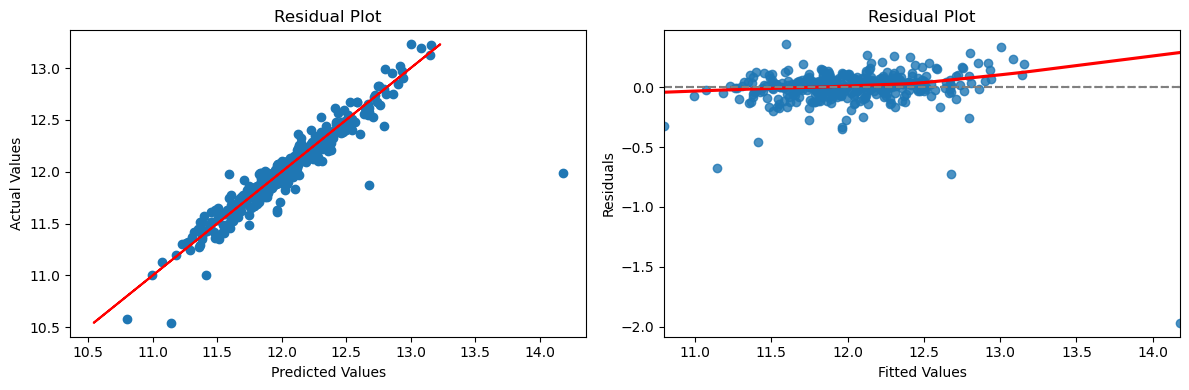

In [136]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted Values')
plt.plot(y_test, y_test, color='red', label='y=x')
plt.ylabel('Actual Values')
plt.title('Residual Plot')

residuals = y_test - y_pred
plt.subplot(1,2,2)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

- From the residual plot, we observe the presence of **leverage points**, which are data points that have a disproportionately large influence on the model's predictions. These points may affect the stability and performance of the model.  

- In general, as seen from the residual plots below, the model tends to **underestimate house prices**, particularly for houses with higher actual values. This suggests that the model might not fully capture the complexity of the highest price ranges.  


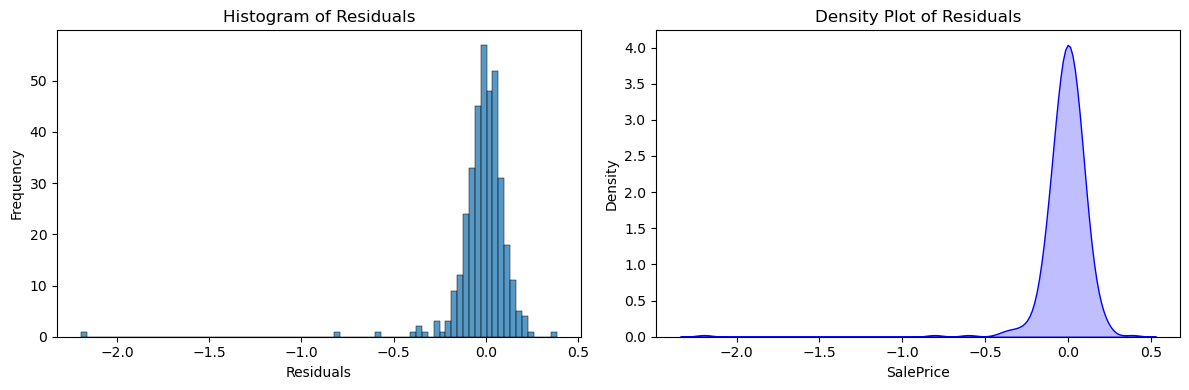

In [137]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
sns.histplot(residuals, kde=False)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

plt.subplot(1,2,2)
sns.kdeplot(residuals, color='blue', fill=True)  
plt.ylabel('Density')
plt.title('Density Plot of Residuals')

plt.tight_layout()
plt.show()

### Ridge Regression

Ridge regression is a regularization technique that modifies the ordinary least squares (OLS) method by adding a **penalty term** to the loss function. This penalty term encourages smaller coefficients by shrinking them towards zero, which helps to reduce model complexity and mitigate **multicollinearity**—the issue of highly correlated features that can distort model predictions.

The loss function for Ridge regression is:

$$
L(\beta) = \sum_{i=1}^{n} \left(y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- `L(β)` is the **loss function**
- `yᵢ` is the **actual value**
- `ŷᵢ` is the **predicted value**
- `βⱼ` are the **model coefficients**
- `λ` is the **regularization parameter** that controls the strength of the penalty
- `p` is the **number of features**

By introducing this regularization, Ridge regression prevents overfitting and improves the model's ability to generalize to unseen data.  


In [138]:
ridge = Ridge() # Regularization Penalty: alpha=0.1 (default)

ridge_fit = ridge.fit(X_train, y_train)
y_train_pred = ridge_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
r2_train_score = r2_score(y_train, y_train_pred)

print(f'R Squared Score: {r2_train_score:.3f}')
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

R Squared Score: 0.940
Training MSE: 0.009
Training RMSE: 0.097


In [139]:
# Model Evaluation
y_pred = ridge_fit.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
print(f'Ridge MSE: {ridge_mse:.3f}')
print(f'Ridge RMSE: {ridge_rmse:.3f}')

Ridge MSE: 0.024
Ridge RMSE: 0.156


In [140]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

### 10-Fold Cross Validation for Ridge Regression

To optimize the model, we will use **10-Fold Cross Validation** with **30 different values of the regularization parameter alpha** ranging from 0 to 10. The goal is to minimize the **Root Mean Squared Error (RMSE)**.

Here’s how the cross-validation process works:

- For each value of alpha, we split the training data into **10 equal subsets** (or folds).
- We then train the model using Ridge Regression with **k-1 subsets** (i.e., 9 subsets) and use the remaining subset to evaluate the model.
- This process is repeated 10 times, each time with a different subset used for evaluation. This ensures that every subset is used for testing exactly once and for training 9 times.
- Finally, we compute the **cross-validation error (CV Error)** for each alpha value by averaging the test errors from each of the 10 folds.

This approach ensures that we obtain a robust evaluation of the model’s performance by testing it on different data subsets and reducing the potential for overfitting.  


In [141]:
alphas = np.linspace(0.001, 10, 30)

ridge = Ridge()
param_grid = [{'alpha': alphas}]

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_  # Convert back to positive RMSE

print("Best Cross-validation RMSE:", best_score)

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train) 

Best Cross-validation RMSE: 0.12131376444109565


Ridge(alpha=7.241655172413794)

In [142]:
y_pred = best_ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f'Ridge Regression MSE: {ridge_mse:.3f}')
print(f'Ridge Regression RMSE: {ridge_rmse:.3f}')

Ridge Regression MSE: 0.026
Ridge Regression RMSE: 0.162


### Lasso Regression

Lasso regression, also known as **L1 regularization**, is a linear regression technique that modifies the ordinary least squares (OLS) method by adding a **penalty term** to the loss function. This penalty term has the effect of shrinking some of the coefficients to exactly zero, which results in **variable selection** and promotes **sparsity** in the model.

The loss function for Lasso regression i$$
L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

Where:
- `L(β)` is the **loss function**
- `yᵢ` is the **actual value**
- `ŷᵢ` is the **predicted value**
- `βⱼ` are the **model coefficients**
- `λ` is the **regularization parameter** that controls the strength of the penalty
- `|βⱼ|` represents the **absolute value** of the model coefficients, which is what leads to the shrinkage of some coefficients to zero

Lasso regression is particularly useful when dealing with **high-dimensional datasets** or when **feature selection** is needed. By forcing some coefficients to zero, it helps reduce the number of features and improves model interpretaility.  
s:



In [143]:
lasso = Lasso() # Regularization Penalty : alpha=1.0 (default)

lasso_fit = lasso.fit(X_train, y_train)
y_train_pred = lasso_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.032
Training RMSE: 0.179


In [144]:
y_pred = lasso_fit.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f'Lasso Regression MSE: {lasso_mse:.3f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.3f}')

Lasso Regression MSE: 0.062
Lasso Regression RMSE: 0.249


As we did before with Ridge regression, we are going to use **10-Fold Cross Validation** for **30 different values of the parameter alpha** between 0 and 10 using `GridSearchCV()`


In [145]:
alphas = np.linspace(0.001,10,30)

lasso = Lasso()
param_grid = [{'alpha': alphas}]

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best Cross-validation Score (negative RMSE):", best_score)

best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

Best Cross-validation Score (negative RMSE): -0.12285972692782399


Lasso(alpha=0.001)

In [146]:
y_pred = best_lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f'Lasso Regression MSE: {lasso_mse:.3f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.3f}')

Lasso Regression MSE: 0.028
Lasso Regression RMSE: 0.167


## Regression Trees

In [147]:
reg = DecisionTreeRegressor()

reg_tree = reg.fit(X_train, y_train)
y_train_pred = reg_tree.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.000
Training RMSE: 0.000


The regression tree model is overfitted. To address this, we are going to **prune the tree** using the **cost complexity penalty (ccp_alpha)** parameter.

The `ccp_alpha` parameter in **Decision Trees** controls the **complexity of the tree** by penalizing the creation of additional nodes. By adjusting this parameter, we can prevent the tree from growing too deep and overfitting the training data. 

- **Higher values of ccp_alpha** result in simpler trees with fewer nodes, as the model is penalized more for adding additional splits.
- **Lower values of ccp_alpha** allow for more complex trees, potentially leading to overfitting.

By tuning the `ccp_alpha` parameter, we can prune the tree based on the **cost-complexity pruning criterion**, which balances model complexity and training error. This helps improve the model's ability to generalize to new, unseen data.
.

### Hyperparameter Tuning

ccp_alpha: 0.0000 | Train Error: 0.000 | Test Error: 0.040
ccp_alpha: 0.0005 | Train Error: 0.024 | Test Error: 0.040
ccp_alpha: 0.0010 | Train Error: 0.032 | Test Error: 0.041
ccp_alpha: 0.0020 | Train Error: 0.041 | Test Error: 0.049
ccp_alpha: 0.0050 | Train Error: 0.055 | Test Error: 0.053
ccp_alpha: 0.0100 | Train Error: 0.062 | Test Error: 0.061
ccp_alpha: 0.0500 | Train Error: 0.085 | Test Error: 0.087
ccp_alpha: 0.1000 | Train Error: 0.158 | Test Error: 0.164
ccp_alpha: 0.3000 | Train Error: 0.158 | Test Error: 0.164


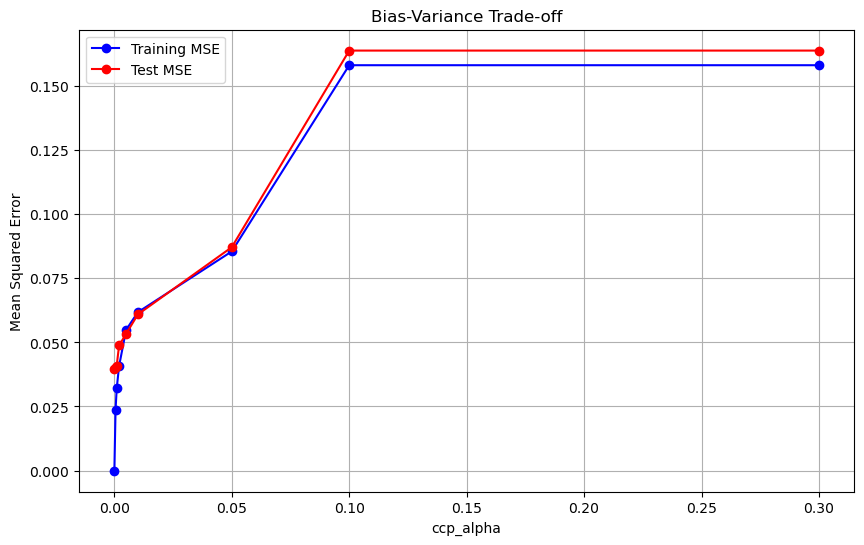

In [148]:
ccp_alphas = [0.0, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3]

train_errors = []
test_errors = []

for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    print(f"ccp_alpha: {ccp_alpha:.4f} | Train Error: {train_error:.3f} | Test Error: {test_error:.3f}")


plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_errors, marker='o', label='Training MSE', color='blue')
plt.plot(ccp_alphas, test_errors, marker='o', label='Test MSE', color='red')
plt.xlabel('ccp_alpha')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

We need to find the right balance between **bias** and **variance** in our regression tree model.

- We choose **ccp_alpha = 0.001** because it results in a **low test MSE (Mean Squared Error)**, indicating good generalization to unseen data.
- Additionally, this value of **ccp_alpha** helps keep the **difference between training and test errors** quite small, thus reducing the **variance** of the model and avoiding overfitting.

This balance between bias and variance ensures that the model performs well on both the training and test dataets.


In [149]:
reg = DecisionTreeRegressor(ccp_alpha=0.001)

reg_tree = reg.fit(X_train, y_train)
y_train_pred = reg_tree.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.032
Training RMSE: 0.179


In [150]:
y_pred = reg_tree.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)

print(f'Test MSE: {tree_mse:.3f}')
print(f'Test RMSE: {tree_rmse:.3f}')

Test MSE: 0.041
Test RMSE: 0.202


## Random Forests

In [151]:
rf = RandomForestRegressor()

forest = rf.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)
training_rmse = np.sqrt(training_mse)
print(f'RF Training MSE: {training_mse:.3f}')
print(f'RF Training RMSE: {training_rmse:.3f}')

RF Training MSE: 0.003
RF Training RMSE: 0.056


In [152]:
y_pred = forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test MSE: {mse:.3f}')
print(f'Test RMSE: {rmse:.3f}')

Test MSE: 0.021
Test RMSE: 0.144


- The model has **high variance**. 

### Hyperparameter Tuning

In [163]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=rmse_scorer, cv=5)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-validation Score (negative ΡMSE):", best_score)

best_model = grid_search.best_estimator_

Elapsed Time: 216.30997729301453 seconds
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score (negative MSE): -0.14631996397561792


In [164]:
y_pred = best_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
print(f'Test MSE: {rf_test_mse:.3f}')
print(f'Test RMSE: {rf_test_rmse:.3f}')

Test MSE: 0.021
Test RMSE: 0.145


## Gradient Boosting

In [155]:
grad = GradientBoostingRegressor()

grad_fit = grad.fit(X_train, y_train)
y_train_pred = grad_fit.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f'Training MSE: {train_mse:.3f}')
print(f'Training RMSE: {train_rmse:.3f}')

Training MSE: 0.006
Training RMSE: 0.078


In [156]:
y_pred = grad_fit.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)

print(f'Test MSE: {grad_mse:.3f}')
print(f'Test RMSE: {grad_rmse:.3f}')

Test MSE: 0.017
Test RMSE: 0.130


In [161]:
grad = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 250],  # Number of trees in the forest
    'learning_rate' : [0.01, 0.1],
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

grid_search = GridSearchCV(estimator=grad, param_grid=param_grid, scoring=rmse_scorer, cv=5)

start_time = time.time()

grid_search.fit(X_train, y_train)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed Time:", elapsed_time, "seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-validation Score (negative RMSE):", best_score)

best_model = grid_search.best_estimator_

Elapsed Time: 14.730738162994385 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 250}
Best Cross-validation Score (negative MSE): -0.13251098420224555


In [162]:
y_pred = best_model.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)
print(f'Test MSE: {grad_mse:.3f}')
print(f'Test RMSE: {grad_rmse:.3f}')

Test MSE: 0.015
Test RMSE: 0.124


## Models Comparison

In [159]:
mses = [lin_reg_mse, ridge_mse, lasso_mse, tree_mse, rf_test_mse, grad_mse]
rmses = [lin_reg_rmse, ridge_rmse, lasso_rmse, tree_rmse, rf_test_rmse, grad_rmse]
methods = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Regression Trees', 'Random Forests', 'Gradient Boosting']

mses_rounded = [round(mse, 3) for mse in mses]
rmses_rounded = [round(rmse, 3) for rmse in rmses]

data = {
    'Model': methods,
    'MSE': mses_rounded,
    'RMSE': rmses_rounded
}

df = pd.DataFrame(data)
df.sort_values(by='RMSE', ascending=True)

,Model,MSE,RMSE
5,Gradient Boosting,0.015,0.124
4,Random Forests,0.021,0.145
0,Linear Regression,0.025,0.159
1,Ridge Regression,0.026,0.162
2,Lasso Regression,0.028,0.167
3,Regression Trees,0.041,0.202


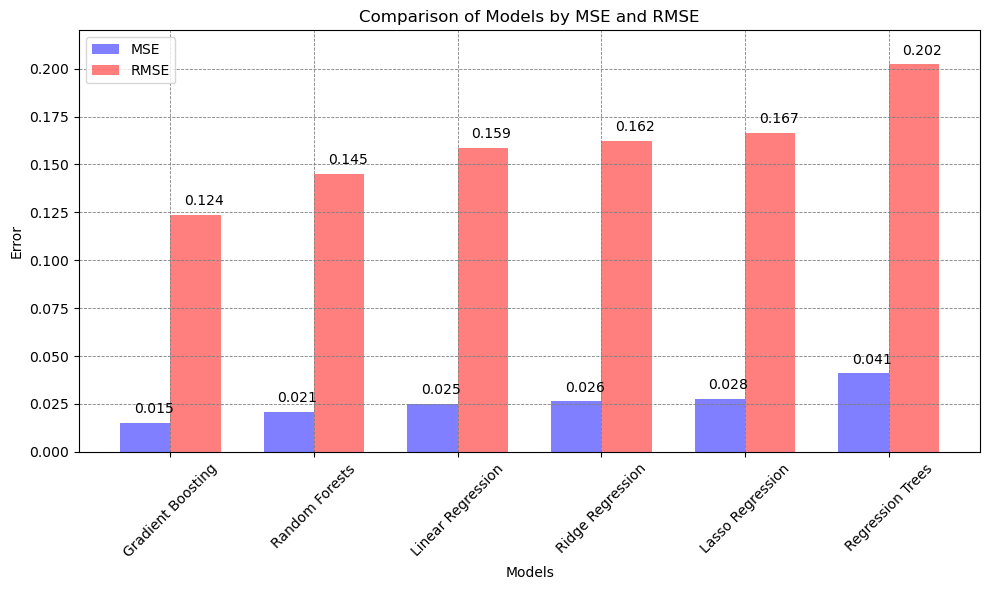

In [160]:
mses = [lin_reg_mse, ridge_mse, lasso_mse, tree_mse, rf_test_mse, grad_mse]
rmses = [lin_reg_rmse, ridge_rmse, lasso_rmse, tree_rmse, rf_test_rmse, grad_rmse]
methods = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Regression Trees', 'Random Forests', 'Gradient Boosting']

sorted_indices = np.argsort(rmses)
sorted_rmses = [rmses[i] for i in sorted_indices]
sorted_mses = [mses[i] for i in sorted_indices]
sorted_methods = [methods[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(methods))

plt.bar(index, sorted_mses, bar_width, color='b', alpha=0.5, label='MSE')
plt.bar([i + bar_width for i in index], sorted_rmses, bar_width, color='r', alpha=0.5, label='RMSE')

for i in index:
    plt.text(i - 0.08, sorted_mses[i] + 0.005, f'{sorted_mses[i]:.3f}', color='black')
    plt.text(i + bar_width - 0.08, sorted_rmses[i] + 0.005, f'{sorted_rmses[i]:.3f}', color='black')

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of Models by MSE and RMSE')
plt.xticks([i + bar_width / 2 for i in index], sorted_methods, rotation=45)
plt.legend()
plt.ylim(0,0.22)
plt.grid(linestyle= '--', linewidth=0.6, c='grey')
plt.tight_layout()
plt.show()


**Gradient Boosting Regressor** gives us the **lowest error** based on the **RMSE** metric, which we chose to evaluate the performance of our models.
